# Assignment 4

## Problem 1

### a)

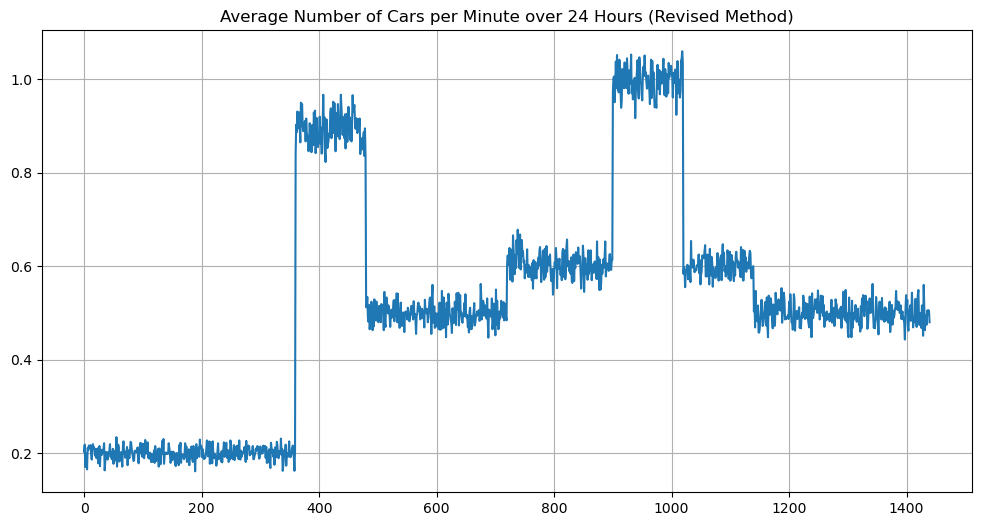

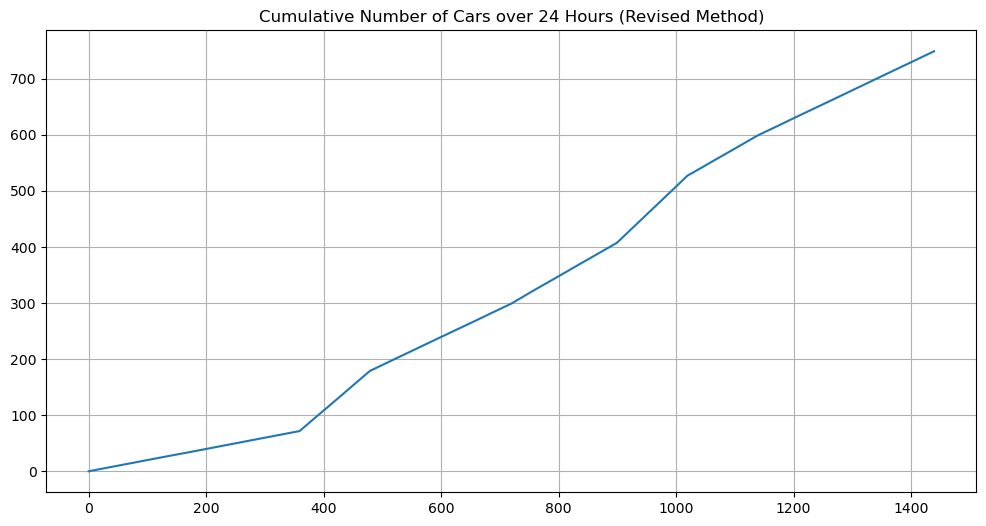

Average number of cars that arrived in one day (Revised Method): 748.841
Average time when the first car arrived (Revised Method): 5.176252714902228 minutes since midnight


In [14]:
import numpy as np
import matplotlib.pyplot as plt

def lambda_t(t):
    if 0 <= t < 360:
        return 0.2
    elif 360 <= t < 480:
        return 0.9
    elif 480 <= t < 720:
        return 0.5
    elif 720 <= t < 900:
        return 0.6
    elif 900 <= t < 1020:
        return 1.0
    elif 1020 <= t < 1140:
        return 0.6
    elif 1140 <= t < 1440:
        return 0.5
    else:
        return 0

T = 1440  # Total time in minutes (24 hours)
U_lambda = 1.0  # Upper bound of λ(t)
num_simulations = 1000

arrival_counts = np.zeros((num_simulations, T))
first_arrival_times = np.zeros(num_simulations)
total_arrivals_per_sim = np.zeros(num_simulations)

for sim in range(num_simulations):
    m = np.random.poisson(U_lambda * T)
    t_i = np.random.uniform(0, T, m)
    lambda_vals = np.array([lambda_t(t) for t in t_i])
    accept_prob = lambda_vals / U_lambda
    u_i = np.random.uniform(0, 1, m)
    accepted_indices = u_i <= accept_prob
    accepted_times = t_i[accepted_indices]
    accepted_times.sort()
    
    total_arrivals = len(accepted_times)
    total_arrivals_per_sim[sim] = total_arrivals
    first_arrival_times[sim] = accepted_times[0] if total_arrivals > 0 else np.nan
    
    counts, _ = np.histogram(accepted_times, bins=np.arange(0, T+1))
    arrival_counts[sim, :] = counts

average_arrivals_per_minute = np.nanmean(arrival_counts, axis=0)
cumulative_arrivals_per_minute = np.cumsum(average_arrivals_per_minute)
average_total_arrivals = np.nanmean(total_arrivals_per_sim)
average_first_arrival_time = np.nanmean(first_arrival_times[np.isfinite(first_arrival_times)])

plt.figure(figsize=(12, 6))
plt.plot(average_arrivals_per_minute)
plt.title('Average Number of Cars per Minute over 24 Hours (Revised Method)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(cumulative_arrivals_per_minute)
plt.title('Cumulative Number of Cars over 24 Hours (Revised Method)')
plt.grid(True)
plt.show()

print("Average number of cars that arrived in one day (Revised Method):", average_total_arrivals)
print("Average time when the first car arrived (Revised Method):", average_first_arrival_time, "minutes since midnight")

### b)

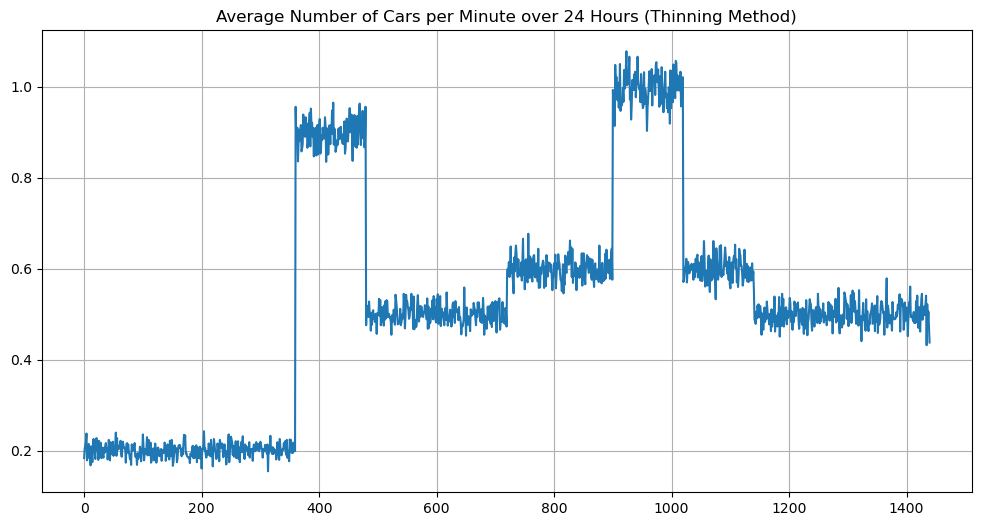

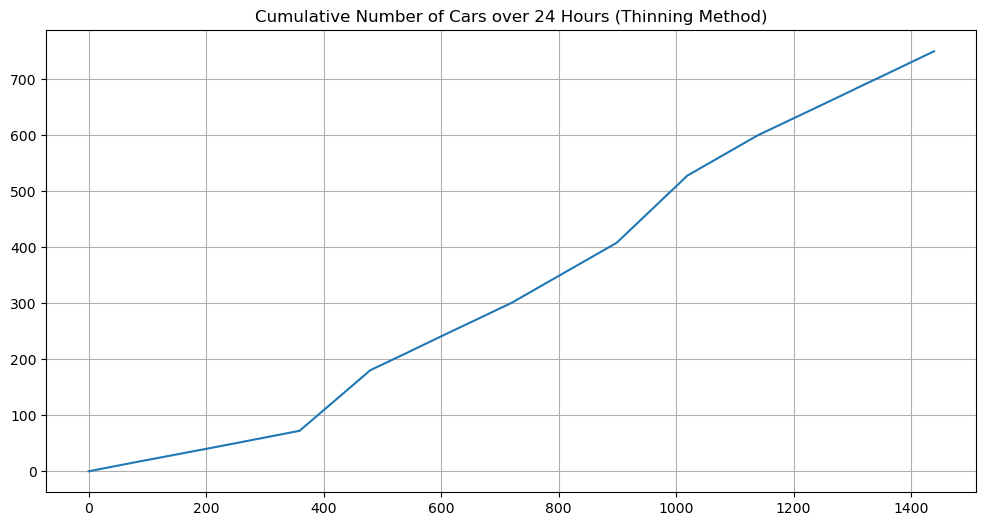

Average number of cars that arrived in one day (Thinning Method): 749.452
Average time when the first car arrived (Thinning Method): 4.974992167557308 minutes since midnight


In [13]:
T = 1440  # Total time in minutes (24 hours)
U_lambda = 1.0  # Maximum rate
num_simulations = 1000

arrival_counts = np.zeros((num_simulations, T))
first_arrival_times = np.zeros(num_simulations)
total_arrivals_per_sim = np.zeros(num_simulations)

for sim in range(num_simulations):
    t = 0
    accepted_times = []
    while t < T:
        delta_t = np.random.exponential(1.0 / U_lambda)
        t += delta_t
        if t >= T:
            break
        accept_prob = lambda_t(t) / U_lambda
        u = np.random.uniform(0, 1)
        if u <= accept_prob:
            accepted_times.append(t)
    accepted_times = np.array(accepted_times)
    accepted_times.sort()
    
    total_arrivals = len(accepted_times)
    total_arrivals_per_sim[sim] = total_arrivals
    first_arrival_times[sim] = accepted_times[0] if total_arrivals > 0 else np.nan
    
    counts, _ = np.histogram(accepted_times, bins=np.arange(0, T+1))
    arrival_counts[sim, :] = counts

average_arrivals_per_minute = np.nanmean(arrival_counts, axis=0)
cumulative_arrivals_per_minute = np.cumsum(average_arrivals_per_minute)
average_total_arrivals = np.nanmean(total_arrivals_per_sim)
average_first_arrival_time = np.nanmean(first_arrival_times[np.isfinite(first_arrival_times)])

plt.figure(figsize=(12, 6))
plt.plot(average_arrivals_per_minute)
plt.title('Average Number of Cars per Minute over 24 Hours (Thinning Method)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(cumulative_arrivals_per_minute)
plt.title('Cumulative Number of Cars over 24 Hours (Thinning Method)')
plt.grid(True)
plt.show()

print("Average number of cars that arrived in one day (Thinning Method):", average_total_arrivals)
print("Average time when the first car arrived (Thinning Method):", average_first_arrival_time, "minutes since midnight")

## Problem 2

### a)

#### i)

In [7]:
def simulate_decay(N0, lambda_c, delta_t):
    """
    Simulates the decay process until half of the nuclei have decayed.
    
    Parameters:
    N0 : int
        Initial number of nuclei.
    lambda_c : float
        Decay rate per nucleus (per second).
    delta_t : float
        Time step size (in seconds).
        
    Returns:
    t_half : float
        Time taken for N0/2 nuclei to decay.
    """
    lambda_total = lambda_c * N0  #total decay rate (lambda)
    cumulative_decays = 0
    t = 0.0  #initialize time
    N_half = N0 / 2  #target cumulative decays
    while cumulative_decays < N_half:
        #expected number of decays in time delta_t
        mean_decays = lambda_total * delta_t
        #number of decays in this time step
        n_decays = np.random.poisson(mean_decays)
        #update cumulative decays
        cumulative_decays += n_decays
        #increment time
        t += delta_t
    return t

#### ii)

In [15]:
N0 = 10000          #initial number of nuclei
lambda_c = 0.3      #decay rate per nucleus (per second)
delta_t = 0.01      #time step size (in seconds)
num_simulations = 1000  #number of simulations

t_half_array = np.zeros(num_simulations)

for i in range(num_simulations):
    t_half = simulate_decay(N0, lambda_c, delta_t)
    t_half_array[i] = t_half

mean_t_half = np.mean(t_half_array)
variance_t_half = np.var(t_half_array)

print("Mean half-time over {} simulations: {:.4f} seconds".format(num_simulations, mean_t_half))
print("Variance of half-time over {} simulations: {:.6f} seconds^2".format(num_simulations, variance_t_half))

Mean half-time over 1000 simulations: 2.3119 seconds
Variance of half-time over 1000 simulations: 0.001076 seconds^2


### b)

#### i)

In [11]:
def simulate_decay(N0, lambda_c, delta_t):
    """
    Simulates the radioactive decay process where decayed nuclei are not replaced.
    
    Parameters:
    N0 : int
        Initial number of nuclei.
    lambda_c : float
        Decay rate per nucleus (per second).
    delta_t : float
        Time step size (in seconds).
        
    Returns:
    t_half : float
        Time taken for N0/2 nuclei to decay.
    """
    N = N0  #current number of undecayed nuclei
    cumulative_decays = 0
    t = 0.0  #initialize time
    N_half = N0 / 2  #target number of undecayed nuclei

    while N > N_half:
        #expected number of decays in time delta_t
        mean_decays = lambda_c * N * delta_t
        #number of decays in this time step
        n_decays = np.random.poisson(mean_decays)
        #ensure we don't have more decays than nuclei
        n_decays = min(n_decays, N)
        #ppdate number of undecayed nuclei
        N -= n_decays
        #ppdate cumulative decays
        cumulative_decays += n_decays
        #increment time
        t += delta_t
    return t

#### ii)

In [12]:
N0 = 10000          
lambda_c = 0.3      
delta_t = 0.01      
num_simulations = 1000  

t_half_array = np.zeros(num_simulations)

for i in range(num_simulations):
    t_half = simulate_decay(N0, lambda_c, delta_t)
    t_half_array[i] = t_half

mean_t_half = np.mean(t_half_array)
variance_t_half = np.var(t_half_array)

print("Mean half-time over {} simulations: {:.4f} seconds".format(num_simulations, mean_t_half))
print("Variance of half-time over {} simulations: {:.6f} seconds^2".format(num_simulations, variance_t_half))

Mean half-time over 1000 simulations: 2.3129 seconds
Variance of half-time over 1000 simulations: 0.001097 seconds^2
